In [1]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def display (img,cmap=None) :
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap=cmap)

#### Pendekatan simple dengan kontur dan Threshold

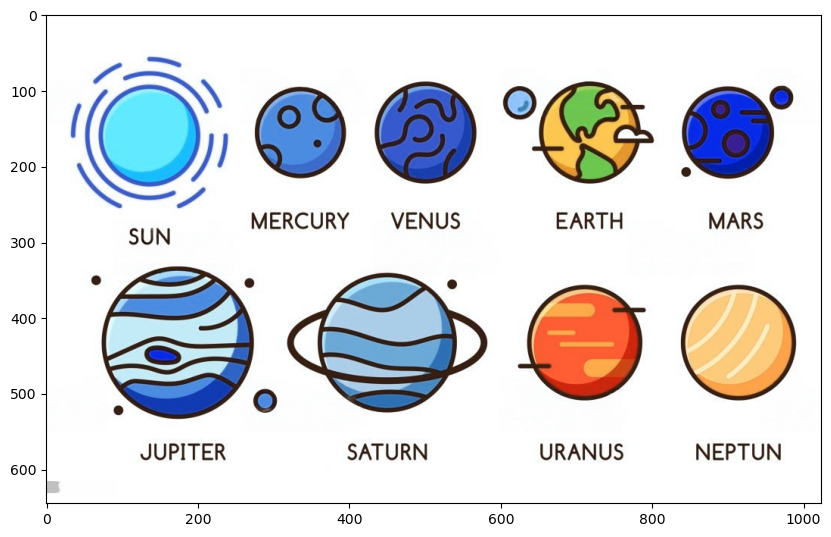

In [3]:
img_coins_ori = cv2.imread('Data/tatasurya.jpg')
display(img_coins_ori)

#### Proses Median Blurring

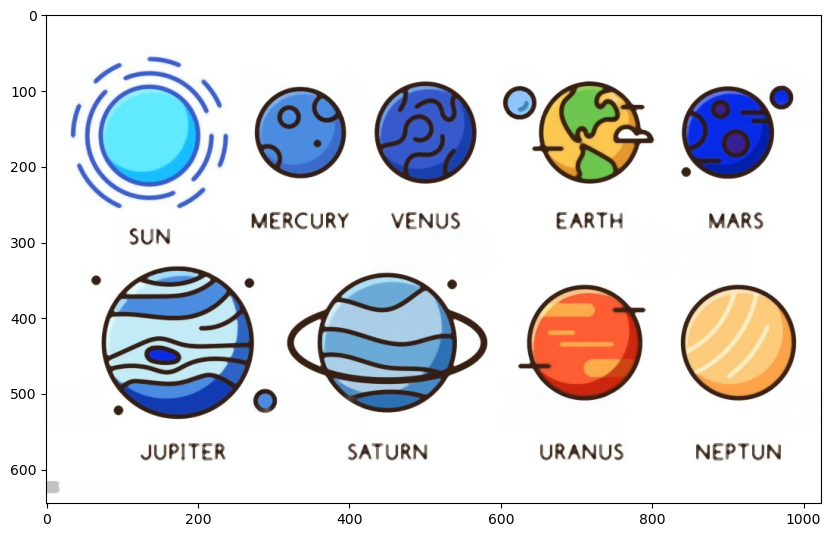

In [4]:
img_blur = cv2.medianBlur(img_coins_ori,5)
display(img_blur)

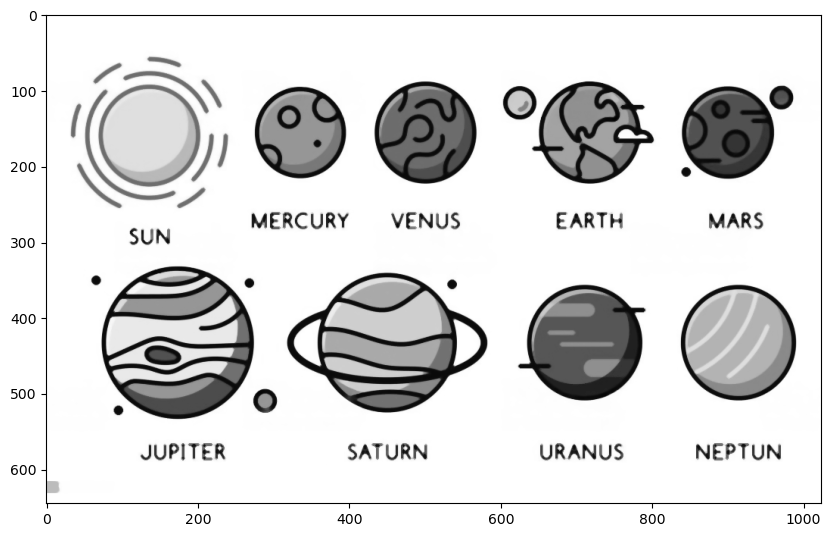

In [5]:
gray_img_coins = cv2.cvtColor(img_blur,cv2.COLOR_BGR2GRAY)
display(gray_img_coins, cmap='gray')

#### Binary Threshold

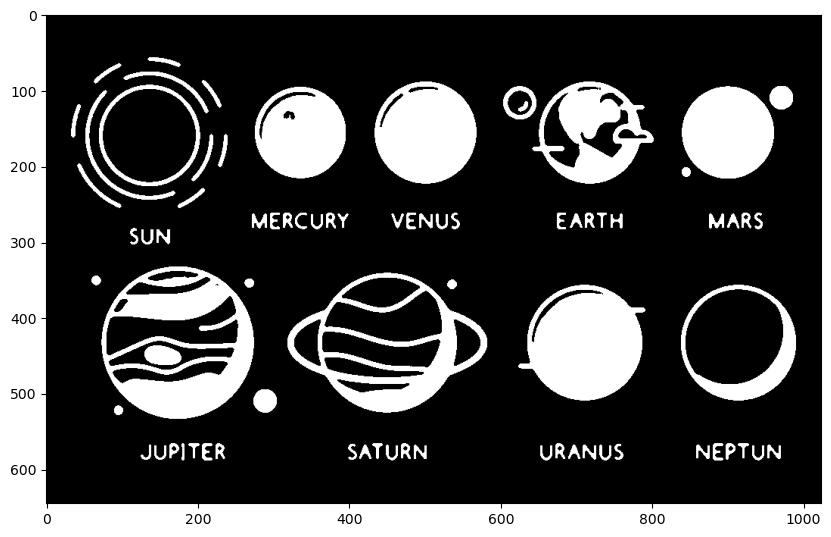

In [6]:
ret, img_thresh = cv2.threshold(gray_img_coins,160,255,cv2.THRESH_BINARY_INV)
display(img_thresh, cmap='gray')

#### Find Contur

In [7]:
contours, hierarchy = cv2.findContours(img_thresh.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

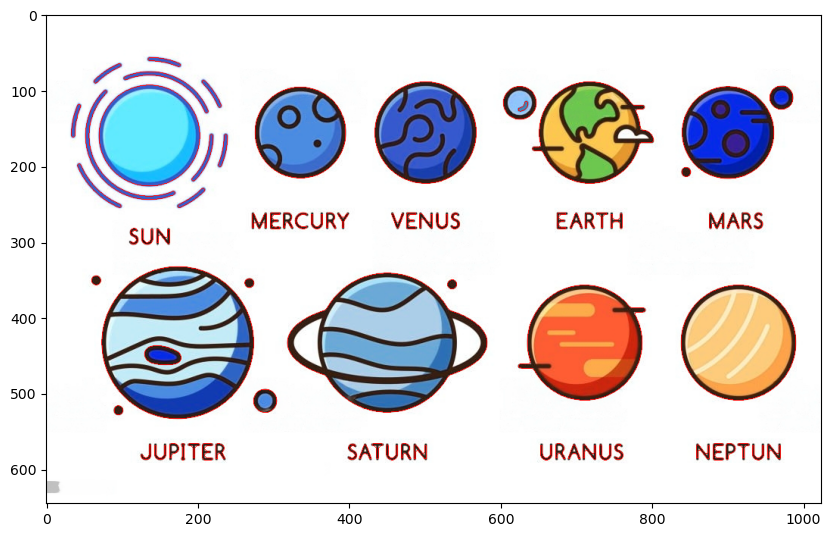

In [8]:
for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(img_coins_ori, contours, i, (255, 0, 0), 1)
        
display(img_coins_ori)

#### Watershed Algorithm
##### Load Gambar

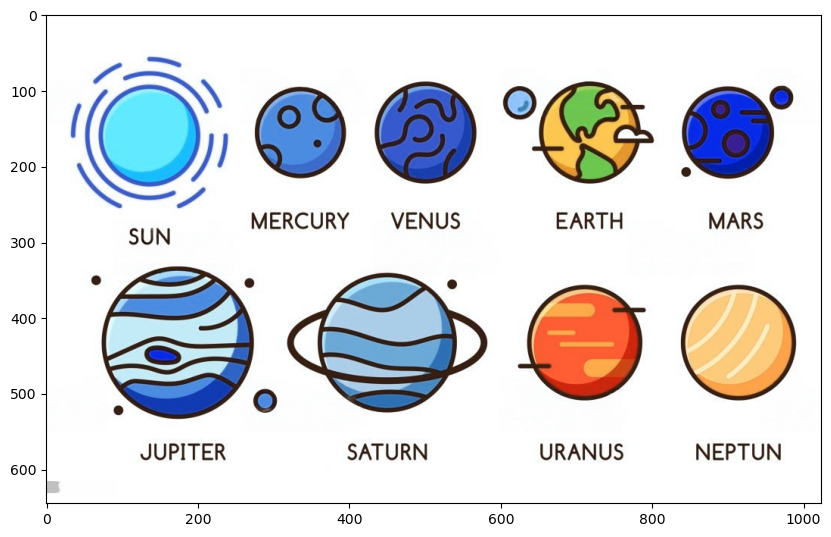

In [9]:
img = cv2.imread('Data/tatasurya.jpg')
display(img)

##### Median Blur

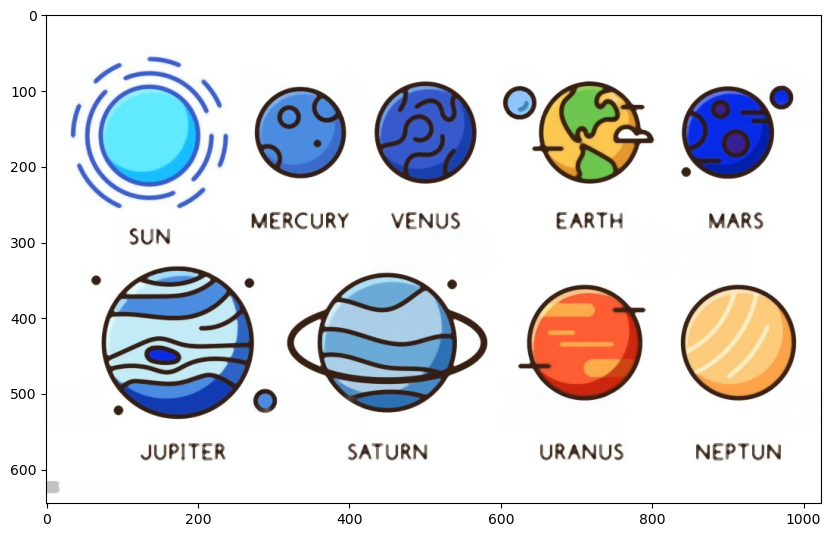

In [10]:
img = cv2.medianBlur(img,5)
display(img)

##### Konversi ke image grayscale

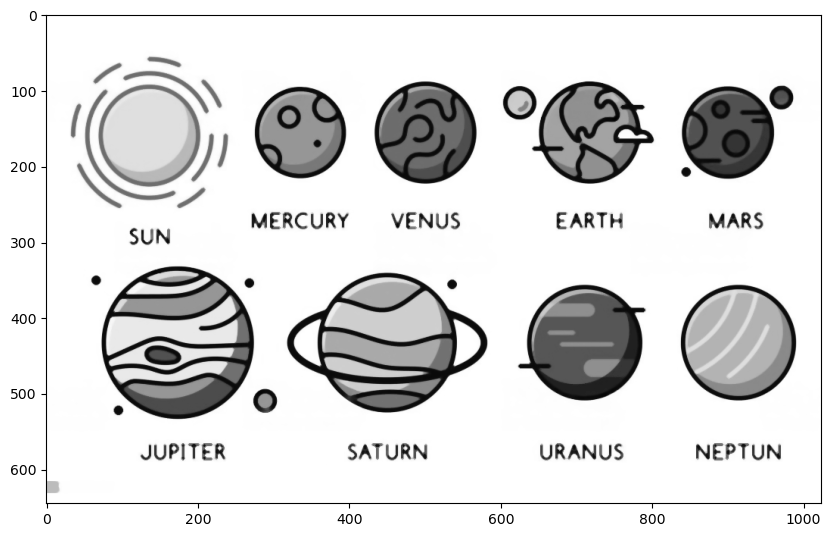

In [11]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
display(gray, cmap="gray")

##### Threshold (Inverse Binary dengan OTSU)

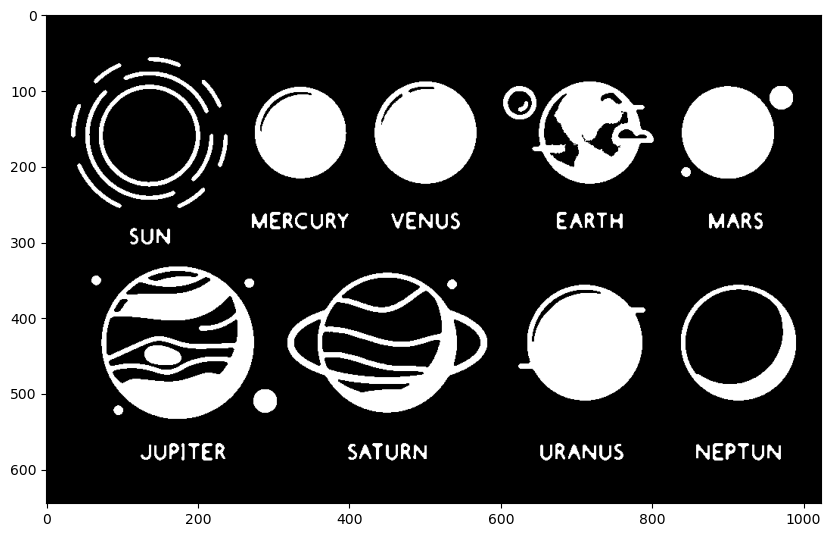

In [12]:
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
display(thresh, cmap="gray")

##### Noise Removal

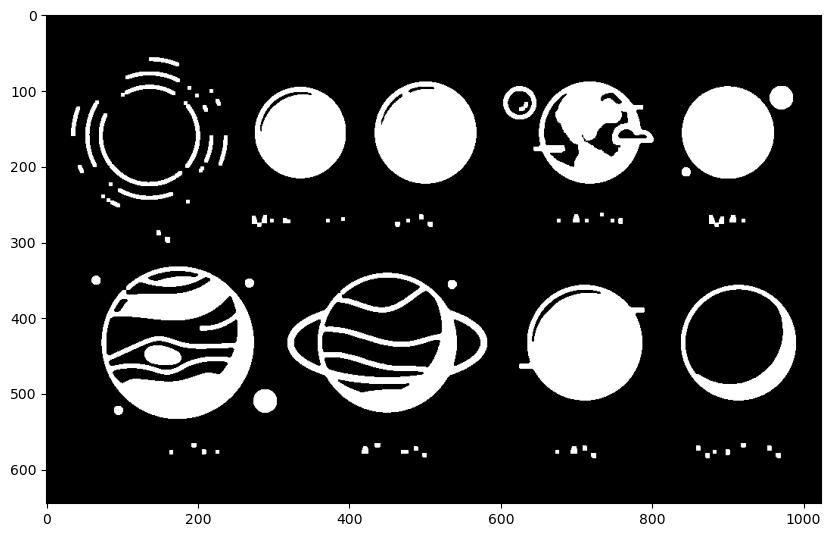

In [13]:
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
display(opening, cmap="gray")

##### Grab Background

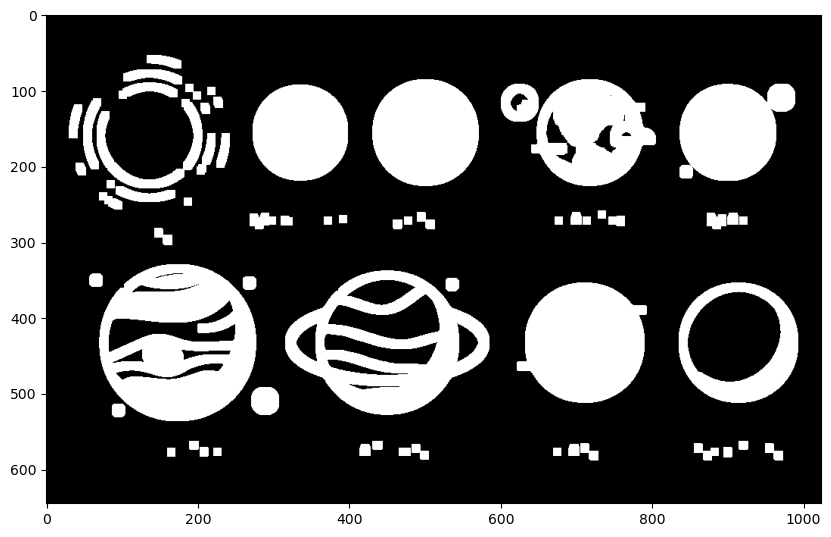

In [14]:
sure_bg = cv2.dilate(opening,kernel,iterations=3)
display(sure_bg, cmap="gray")

##### Find Sure Foreground

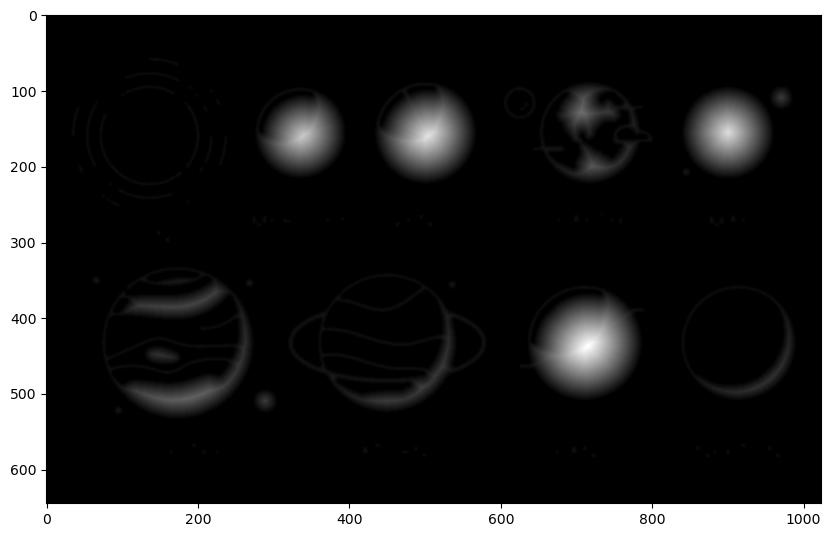

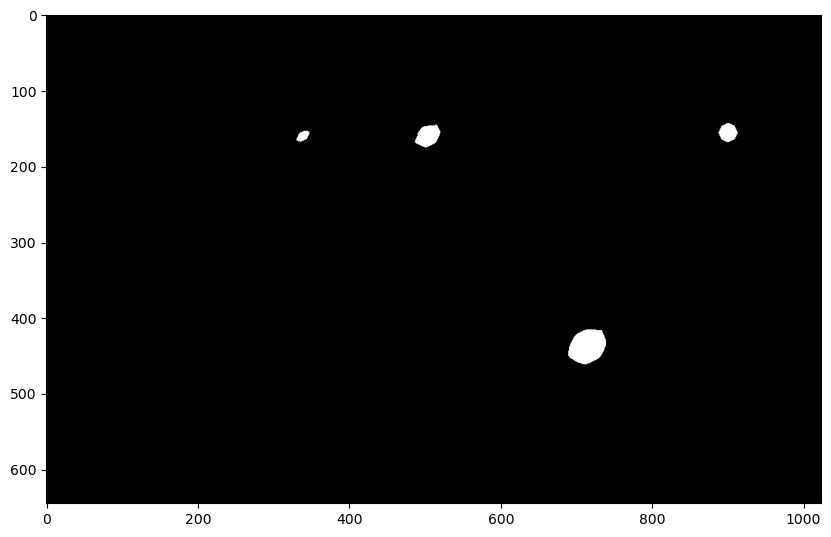

In [16]:
dist_transform=[]
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
display(dist_transform, cmap="gray")
display(sure_fg, cmap="gray")

##### Find Unknown Region

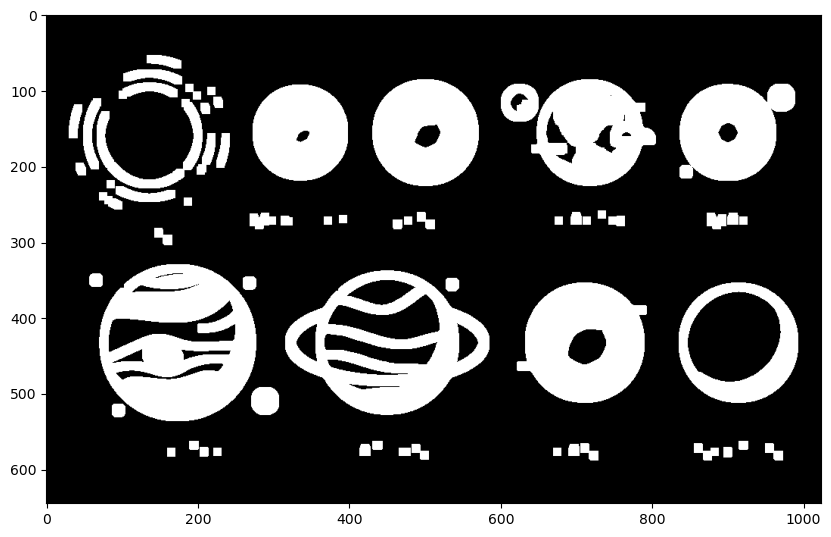

In [17]:
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
display(unknown,cmap='gray')

##### Label Markers of Sure Foreground

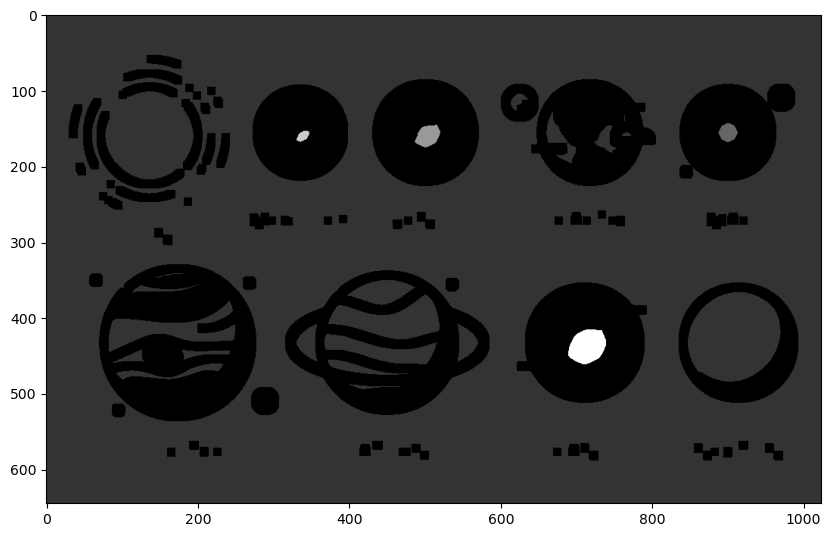

In [18]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
markers = markers+1
markers[unknown==255] = 0
display(markers,cmap='gray')

##### Watershed Algorithm untuk find Markers

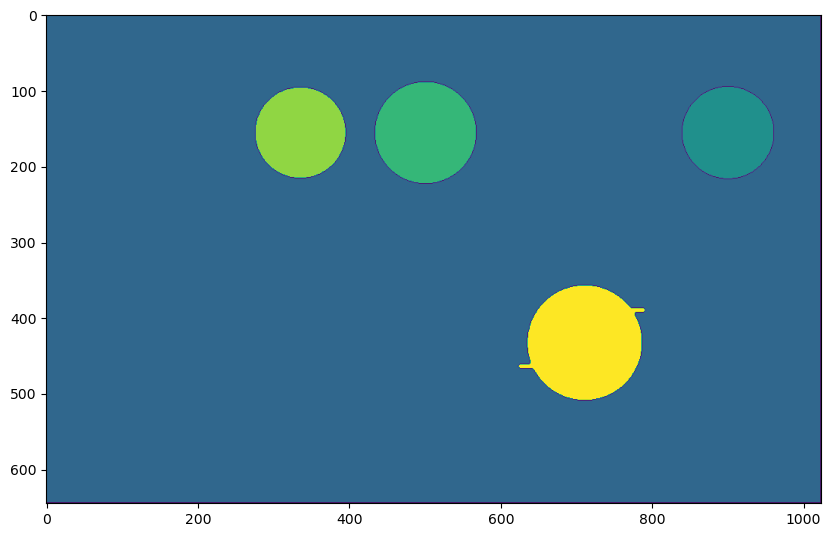

In [19]:
markers = cv2.watershed(img,markers)
display(markers)

##### Find Contours pada Markers

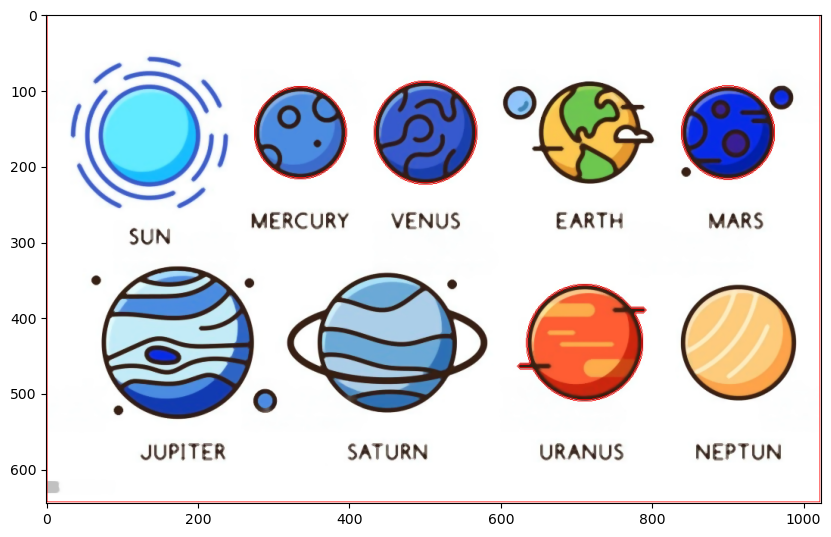

In [20]:
contours, hierarchy = cv2.findContours(markers.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(img, contours, i, (255, 0, 0), 1)
display(img)